## Assignment-8

## Clustering Analysis

In [1]:
## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

In [2]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

## Data Preprocessing

In [4]:
## Datasets
data=pd.read_excel("D:\Assignments Data Science ExcelR\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name='data')

In [5]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
# Perform EDA
print(data.head())  # Display first few rows

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [7]:
print(data.shape)

(3999, 12)


In [8]:
print(data.describe())

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [10]:
print(data.dtypes)

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object


In [11]:
print(data.columns)

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


In [12]:
statistics = data.describe()
statistics.loc['mode'] = data.mode().iloc[0]
print(statistics)

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   
mode      1.000000  1.000000e+03      0.000000     1.000000     1.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.96782

In [13]:
# Handling missing values
data.dropna(inplace=True)  # Remove rows with missing values

In [14]:
# Count of duplicates rows
data[data.duplicated()].shape

(0, 12)

In [15]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [16]:
# Remove outliers using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
## removing Outliers
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print('IQR for each column:',IQR)

IQR for each column: ID#                   1970.0
Balance              50705.5
Qual_miles               0.0
cc1_miles                2.0
cc2_miles                0.0
cc3_miles                0.0
Bonus_miles          16589.0
Bonus_trans             13.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     3411.5
Award?                   1.0
dtype: float64


In [18]:
upper_quant=Q3+1.5*IQR
print('upper_quant:',upper_quant)
lowe_quant=Q1-1.5*IQR
print('lowe_quant:',lowe_quant)

upper_quant: ID#                    6056.50
Balance              142038.75
Qual_miles                0.00
cc1_miles                 6.00
cc2_miles                 1.00
cc3_miles                 1.00
Bonus_miles           41972.50
Bonus_trans              34.50
Flight_miles_12mo         0.00
Flight_trans_12           0.00
Days_since_enroll     10683.25
Award?                    2.50
dtype: float64
lowe_quant: ID#                  -1823.50
Balance             -60783.25
Qual_miles               0.00
cc1_miles               -2.00
cc2_miles                1.00
cc3_miles                1.00
Bonus_miles         -24383.50
Bonus_trans            -17.50
Flight_miles_12mo        0.00
Flight_trans_12          0.00
Days_since_enroll    -2962.75
Award?                  -1.50
dtype: float64


In [19]:
## removing outliers from column'balance'
##df1p=data withot outliers in balance colum
df1p=data[(data['Balance']>3200) & (data['Balance']<17200)]
df1p

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
17,18,13958,0,1,1,1,4291,5,0,0,6905,1
27,28,8828,0,1,1,1,0,0,0,0,7914,0
31,32,10021,0,1,1,1,0,0,0,0,7879,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1
3988,4011,5000,0,1,1,1,2125,3,0,0,1412,0
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0


In [20]:
## removing outliers from 'ID#' column
## df1b= df without outliers in balance and ID# column
df1b=df1p[(df1p['ID#']>-23062.25) & (df1p['ID#']<153103.75)]
df1b

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
17,18,13958,0,1,1,1,4291,5,0,0,6905,1
27,28,8828,0,1,1,1,0,0,0,0,7914,0
31,32,10021,0,1,1,1,0,0,0,0,7879,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1
3988,4011,5000,0,1,1,1,2125,3,0,0,1412,0
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0


In [21]:
## removin outliers from 'bonus_miles' column
## df1c= df without outliers in columns 'bonus_miles','balance'and 'ID#'
df1c=df1p[(df1p['Bonus_miles']>1100.00) & (df1p['Bonus_miles']<1900.00)]
df1c

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
55,56,14448,0,1,1,1,1625,6,0,0,6856,0
66,67,9375,0,1,1,1,1750,7,0,0,6826,0
350,355,15283,0,1,1,1,1250,3,0,0,7132,0
398,404,15669,0,1,1,1,1205,4,0,0,8296,0
409,415,10732,0,1,1,1,1296,6,0,0,8296,0
495,501,10994,0,1,1,1,1250,3,0,0,8007,0
577,584,3294,0,1,1,1,1330,2,0,0,6498,0
709,719,16803,0,1,1,1,1287,6,0,0,6291,0
766,776,14662,0,1,1,1,1110,12,0,0,6197,0
786,796,8207,0,1,1,1,1750,7,0,0,6184,0


In [22]:
## removin outliers from 'Days_since_enroll' column
##df1d= df without outliers in columns 'Bonus_miles','balance', 'ID#' and 'Days_since_enroll' column
df1d=df1c[(df1c['Days_since_enroll']>972.50) & (df1c['Days_since_enroll']<1152.50)]
df1d

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3552,3575,4500,0,1,1,1,1500,5,0,0,1033,0


In [23]:
## checking for correlation( we check correlation for numerical columns only)
df1c.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.347610,NaN,NaN,NaN,NaN,0.382208,0.067920,0.147121,0.139588,-0.972000,-0.005013
Balance,-0.347610,1.000000,NaN,NaN,NaN,NaN,-0.210703,-0.123923,0.025660,-0.004102,0.331013,-0.076622
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,0.382208,-0.210703,NaN,NaN,NaN,NaN,1.000000,0.366909,-0.065896,-0.204951,-0.404191,0.021868
Bonus_trans,0.067920,-0.123923,NaN,NaN,NaN,NaN,0.366909,1.000000,-0.056556,-0.072390,-0.083816,0.156450
Flight_miles_12mo,0.147121,0.025660,NaN,NaN,NaN,NaN,-0.065896,-0.056556,1.000000,0.837723,-0.192127,0.192233
Flight_trans_12,0.139588,-0.004102,NaN,NaN,NaN,NaN,-0.204951,-0.072390,0.837723,1.000000,-0.153515,0.348335


In [24]:
df2=df1c.drop(['Qual_miles','cc1_miles','cc2_miles','cc3_miles'],axis=1)
df2

,ID#,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
55,56,14448,1625,6,0,0,6856,0
66,67,9375,1750,7,0,0,6826,0
350,355,15283,1250,3,0,0,7132,0
398,404,15669,1205,4,0,0,8296,0
409,415,10732,1296,6,0,0,8296,0
495,501,10994,1250,3,0,0,8007,0
577,584,3294,1330,2,0,0,6498,0
709,719,16803,1287,6,0,0,6291,0
766,776,14662,1110,12,0,0,6197,0
786,796,8207,1750,7,0,0,6184,0


In [25]:
## Scaling
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()

In [26]:
# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [27]:
# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [28]:
df3=pd.DataFrame(std_sca.fit_transform(df2))
df3

,0,1,2,3,4,5,6,7
0,-1.833271,1.283057,0.634040,0.153020,-0.318884,-0.347851,1.465018,-0.304290
1,-1.824124,-0.038457,1.192641,0.514149,-0.318884,-0.347851,1.451223,-0.304290
2,-1.584634,1.500574,-1.041762,-0.930364,-0.318884,-0.347851,1.591926,-0.304290
3,-1.543888,1.601126,-1.242859,-0.569236,-0.318884,-0.347851,2.127148,-0.304290
4,-1.534740,0.315041,-0.836197,0.153020,-0.318884,-0.347851,2.127148,-0.304290
5,-1.463226,0.383292,-1.041762,-0.930364,-0.318884,-0.347851,1.994262,-0.304290
6,-1.394206,-1.622554,-0.684258,-1.291493,-0.318884,-0.347851,1.300405,-0.304290
7,-1.281945,1.896533,-0.876416,0.153020,-0.318884,-0.347851,1.205224,-0.304290
8,-1.234546,1.338804,-1.667395,2.319790,-0.318884,-0.347851,1.162001,-0.304290
9,-1.217915,-0.342720,1.192641,0.514149,-0.318884,-0.347851,1.156024,-0.304290


In [29]:
## renaming the columns

In [30]:
df2.columns

Index(['ID#', 'Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Days_since_enroll', 'Award?'],
      dtype='object')

In [31]:
df3.rename(columns={0:'ID#', 1:'Balance',2: 'Bonus_miles',  3:'Bonus_trans',4: 'Flight_miles_12mo',5: 'Flight_trans_12',6: 'Days_since_enroll',7: 'Award?'},inplace=True)

In [32]:
df3.describe()

,ID#,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01
mean,-2.182811e-16,-4.704335e-17,3.316556e-17,-8.467803e-17,1.223127e-16,-3.575294e-17,-1.580657e-16,-5.268855e-17
std,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00
min,-1.833271e+00,-1.622554e+00,-1.667395e+00,-1.652621e+00,-3.188836e-01,-3.478505e-01,-1.545376e+00,-3.042903e-01
25%,-8.499486e-01,-7.647291e-01,-9.590894e-01,-9.303643e-01,-3.188836e-01,-3.478505e-01,-1.035444e+00,-3.042903e-01
50%,-1.381240e-02,-1.033211e-01,7.543953e-02,-2.081078e-01,-3.188836e-01,-3.478505e-01,6.488814e-02,-3.042903e-01
75%,1.065140e+00,7.823769e-01,7.167134e-01,5.141487e-01,-3.188836e-01,-3.478505e-01,7.844950e-01,-3.042903e-01
max,1.430612e+00,1.896533e+00,1.751242e+00,2.680918e+00,4.968299e+00,3.383637e+00,2.127148e+00,3.286335e+00


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID#                59 non-null     float64
 1   Balance            59 non-null     float64
 2   Bonus_miles        59 non-null     float64
 3   Bonus_trans        59 non-null     float64
 4   Flight_miles_12mo  59 non-null     float64
 5   Flight_trans_12    59 non-null     float64
 6   Days_since_enroll  59 non-null     float64
 7   Award?             59 non-null     float64
dtypes: float64(8)
memory usage: 3.8 KB


In [34]:
import seaborn as sns

In [35]:
import warnings
warnings.filterwarnings('ignore')

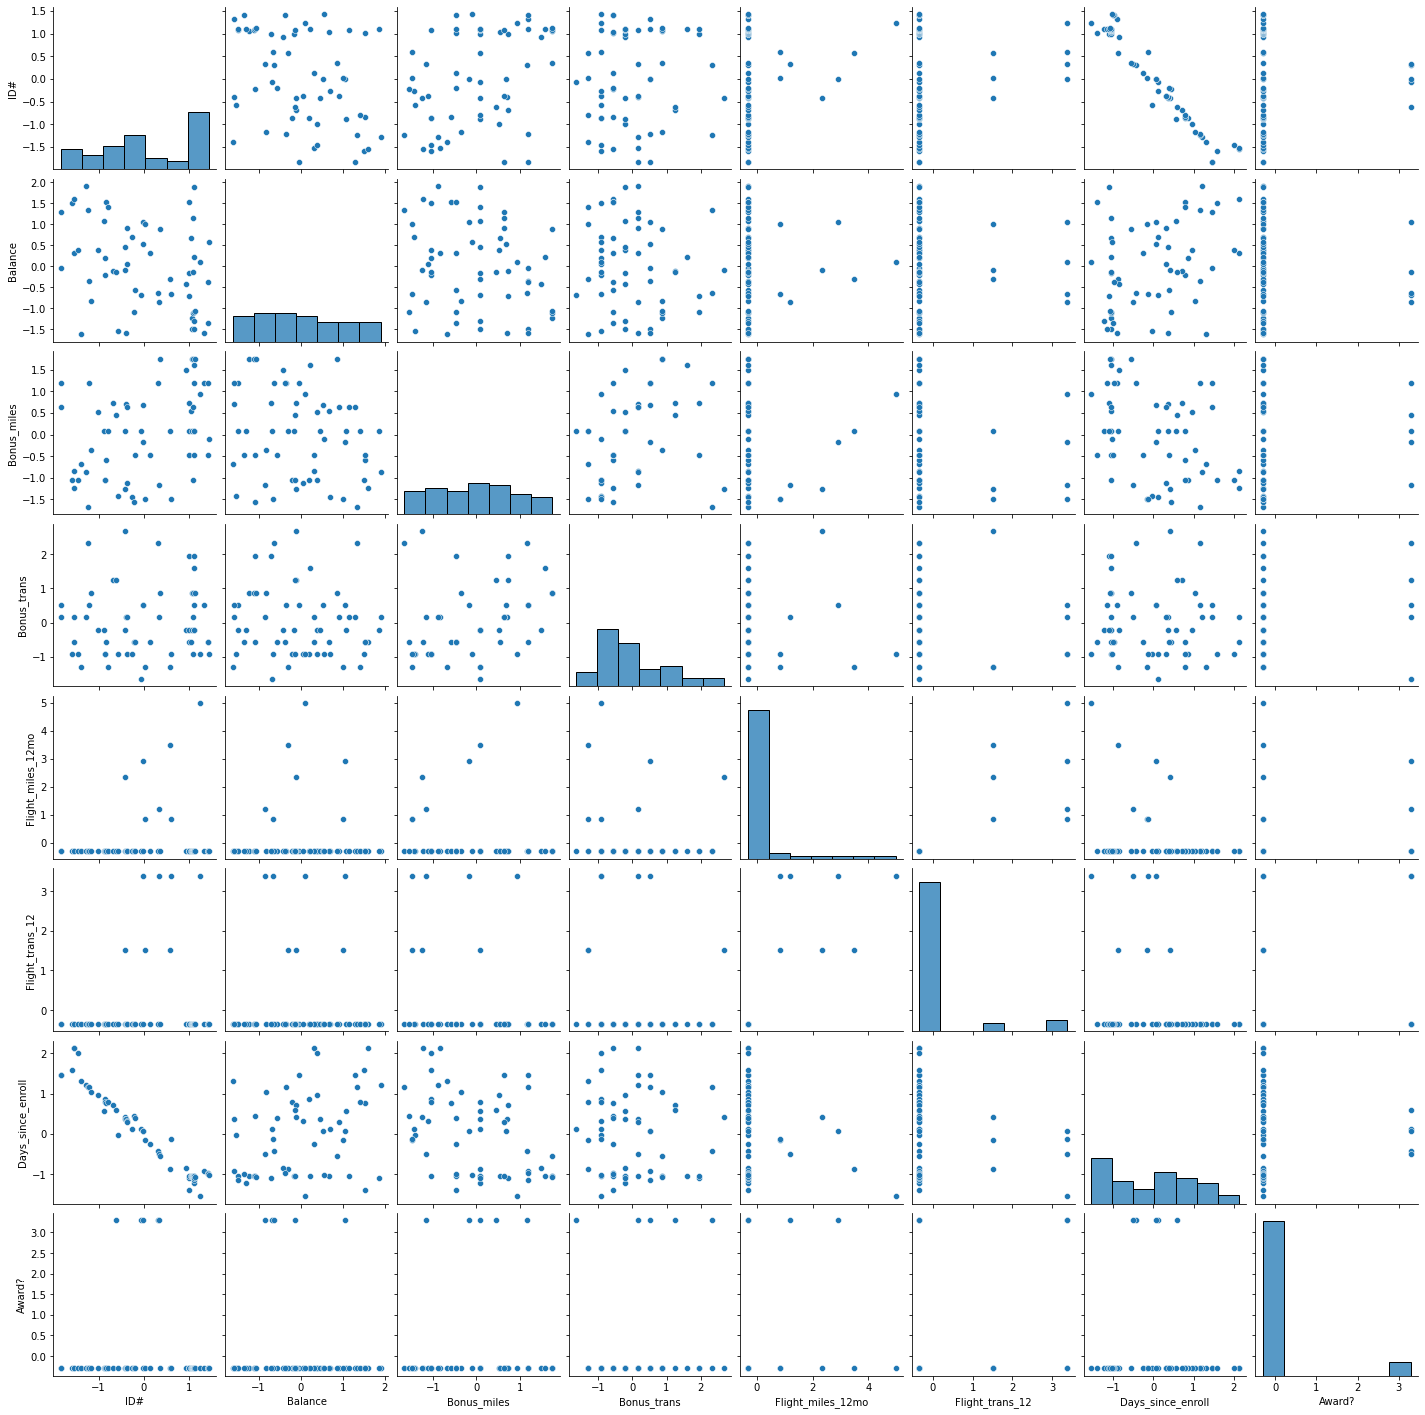

In [36]:
sns.pairplot(df3)
plt.show()

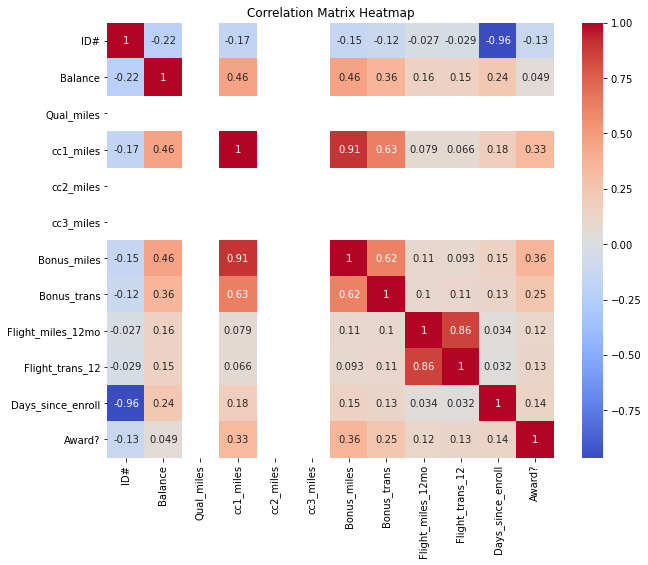

In [37]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [39]:
from sklearn.cluster import KMeans

In [40]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)

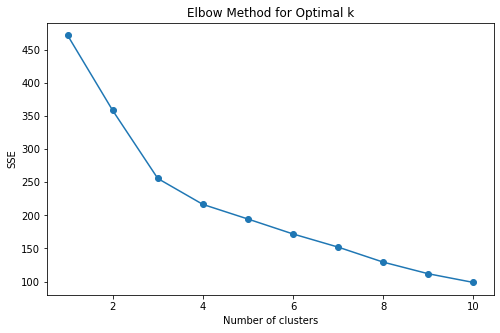

In [41]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [42]:
# Implement K-Means with the optimal number of clusters (e.g., k=3)
optimal_k = 3  # This value can be chosen based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df3)

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
# Calculate silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(df3, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_silhouette_score}')

Silhouette Score for K-Means: 0.3007243974031263


## Implementing Clustering Algorithms

In [ ]:
## HIERARCHICAL

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel("D:\Assignments Data Science ExcelR\Clustering\Clustering\EastWestAirlines.xlsx", sheet_name='data')

# Remove non-numeric columns
data_numeric = data.drop(['ID#', 'Award?'], axis=1)

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

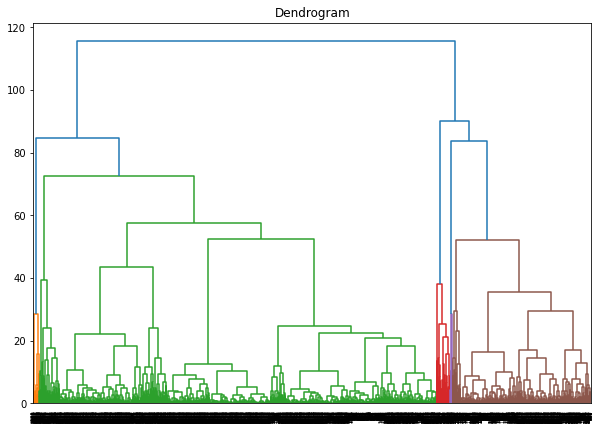

In [49]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

In [50]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(data_scaled)

# Add cluster labels to the original dataframe
data['Cluster'] = cluster_labels

# Display summary statistics for each cluster
print(data.groupby('Cluster').mean())

                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        2258.335439   50456.873333  177.163509   1.397193   1.000000   
1        1359.163306  132018.774194   31.729839   3.919355   1.000000   
2        1497.604167  148606.020833  393.125000   2.666667   1.000000   
3        2269.372093   68876.581395   23.255814   1.139535   2.348837   
4        1742.444444  129951.388889   65.666667   3.388889   1.000000   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.000000   6866.912982     8.351579         323.272632   
1         1.000000  43081.317540    18.391129         246.139113   
2         1.000000  42401.354167    32.541667        6683.468750   
3         1.000000  14689.837209    17.534884         582.627907   
4         3.722222  86259.888889    26.222222         422.222222   

         Fl

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['Balance'], data['Bonus_miles'], c=cluster_labels, cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title('Hierarchical Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.32701816589484084


In [129]:
data1=(data.iloc[:,1:])
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [131]:
# Normalized data frame (considering the numerical part of data)
data1_norm = norm_func(data1.iloc[:,1:])

In [133]:
data1_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,NaN,0.0,NaN,NaN,0.003032,0.026316,0.000000,0.0,0.843629,0.0
1,NaN,0.0,NaN,NaN,0.003747,0.052632,0.000000,0.0,0.839768,0.0
2,NaN,0.0,NaN,NaN,0.071852,0.105263,0.000000,0.0,0.847732,0.0
3,NaN,0.0,NaN,NaN,0.008714,0.026316,0.000000,0.0,0.837838,0.0
5,NaN,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.836631,0.0
...,...,...,...,...,...,...,...,...,...,...
3994,NaN,0.0,NaN,NaN,0.148566,0.105263,0.260756,0.5,0.168316,1.0
3995,NaN,0.0,NaN,NaN,0.017096,0.131579,0.000000,0.0,0.167350,1.0
3996,NaN,0.5,NaN,NaN,0.443467,0.210526,0.000000,0.0,0.168195,1.0
3997,NaN,0.0,NaN,NaN,0.008714,0.026316,0.651890,0.5,0.168074,0.0


In [143]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [145]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=3)

In [155]:
Clusters=pd.DataFrame(columns=['Clusters'])
Clusters

,Clusters


## K-MEANS

In [53]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

<AxesSubplot:xlabel='X', ylabel='Y'>

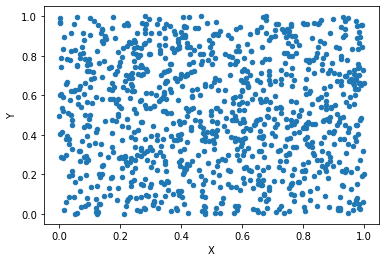

In [55]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [56]:
X = np.random.uniform(0,1,1000)
X

array([0.95385785, 0.09125139, 0.11835584, 0.40560683, 0.94942734,
       0.19360136, 0.06339693, 0.0473322 , 0.0867634 , 0.9813098 ,
       0.07916015, 0.40537493, 0.84336215, 0.86476458, 0.91508736,
       0.54050668, 0.21298117, 0.95181263, 0.55494359, 0.93997979,
       0.03587984, 0.59683823, 0.16233033, 0.86056433, 0.00634672,
       0.79417152, 0.30344503, 0.96688327, 0.35138014, 0.32292234,
       0.85309615, 0.50615985, 0.23721898, 0.92220557, 0.4466603 ,
       0.28320847, 0.2511041 , 0.85557668, 0.64748137, 0.07597988,
       0.28153397, 0.39191245, 0.39292121, 0.31253399, 0.84901168,
       0.74568519, 0.72766988, 0.04322743, 0.71309986, 0.21567435,
       0.99547781, 0.60747298, 0.83812846, 0.00589787, 0.63519504,
       0.24159761, 0.45492288, 0.21797615, 0.50121362, 0.07160858,
       0.27843917, 0.7650041 , 0.00747912, 0.87019791, 0.62567991,
       0.38696806, 0.07434126, 0.28703731, 0.15737848, 0.78166968,
       0.55806075, 0.14869022, 0.52556228, 0.77971148, 0.17382

<AxesSubplot:xlabel='X', ylabel='Y'>

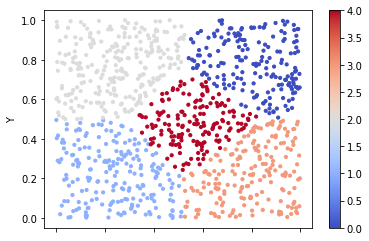

In [57]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [68]:
data=pd.read_excel("D:\Assignments Data Science ExcelR\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name='data')

In [69]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])


df_norm.head(10)  # Top 10 rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


In [70]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row

array([3, 3, 3, ..., 2, 1, 1])

In [71]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
data['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [72]:
data.iloc[:,1:7].groupby(data.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204
1,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178
3,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885
4,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245


In [73]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    Wcss.append(kmeans.inertia_)

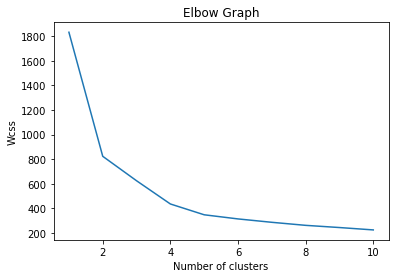

In [76]:
plt.plot(range(1,11),Wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

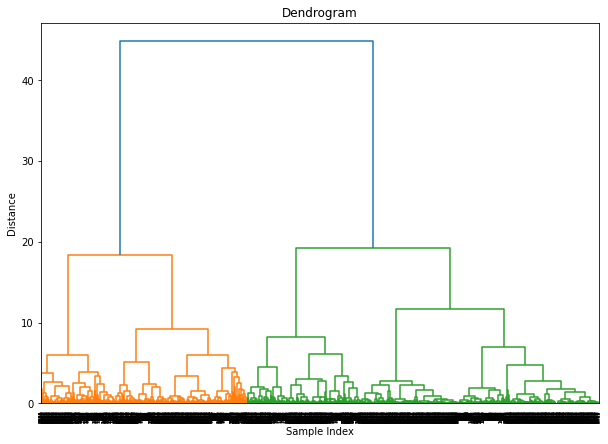

In [77]:

# Perform hierarchical clustering
linkage_matrix = linkage(df_norm, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)

# Customize the plot
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Show the plot
plt.show()

## DBSCAN

In [79]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

In [80]:
# Import .csv file and convert it to a DataFrame object
data=pd.read_excel("D:\Assignments Data Science ExcelR\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name='data')
print(data.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [82]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [83]:
data.drop(['ID#','Award?'],axis=1,inplace=True)

In [84]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [85]:
array=data.values
array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [86]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [87]:
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=12)

In [88]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [90]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,0
3997,0


In [91]:
pd.concat([data,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,-1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [92]:
cluster=DBSCAN(eps=0.3,min_samples=4).fit(df_norm).labels_

In [93]:
np.unique(cluster)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [94]:
silhouette_score(df_norm,cluster)

0.23361850393033437

In [95]:
output=[]
eps=[0.1,0.2,0.3,0.4,0.5,0.6]
min_nodes= range(1,11)
for ep in eps:
        for mn in min_nodes:
            labels= DBSCAN(eps=ep,min_samples=mn).fit(df_norm).labels_
            score= silhouette_score(df_norm,labels)
            output.append([ep,mn,score])
print(output)

[[0.1, 1, -0.26802386541918394], [0.1, 2, -0.05188851558847324], [0.1, 3, 0.15928784865124537], [0.1, 4, 0.16365201359469525], [0.1, 5, 0.15812854262821233], [0.1, 6, 0.011347246365108359], [0.1, 7, 0.03062489828069928], [0.1, 8, 0.1399507485743749], [0.1, 9, 0.12840976867479503], [0.1, 10, 0.11905883116527613], [0.2, 1, 0.08499533697640713], [0.2, 2, 0.1905088022637984], [0.2, 3, 0.22118130619779805], [0.2, 4, 0.21807931687595566], [0.2, 5, 0.22038966267435867], [0.2, 6, 0.21890332762342915], [0.2, 7, 0.21776934333614045], [0.2, 8, 0.21696001162178596], [0.2, 9, 0.21520457633830528], [0.2, 10, 0.21486415449176807], [0.3, 1, 0.06908336187702571], [0.3, 2, 0.12760205819003437], [0.3, 3, 0.14751727746334345], [0.3, 4, 0.23361850393033437], [0.3, 5, 0.22946573625816832], [0.3, 6, 0.31828846369399605], [0.3, 7, 0.31864926197830556], [0.3, 8, 0.32169564500248915], [0.3, 9, 0.32169564500248915], [0.3, 10, 0.3214758047084957], [0.4, 1, 0.14438138414747817], [0.4, 2, 0.21460594258504748], [0.4

In [96]:
a=pd.DataFrame(output)
a.head()

,0,1,2
0,0.1,1,-0.268024
1,0.1,2,-0.051889
2,0.1,3,0.159288
3,0.1,4,0.163652
4,0.1,5,0.158129


In [97]:
a.iloc[:,2].max()

0.5355366159514389

In [98]:
a[a[2]==0.6811897093459002]

,0,1,2


In [99]:
labels= DBSCAN(eps=0.2,min_samples=7).fit(df_norm).labels_

In [100]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

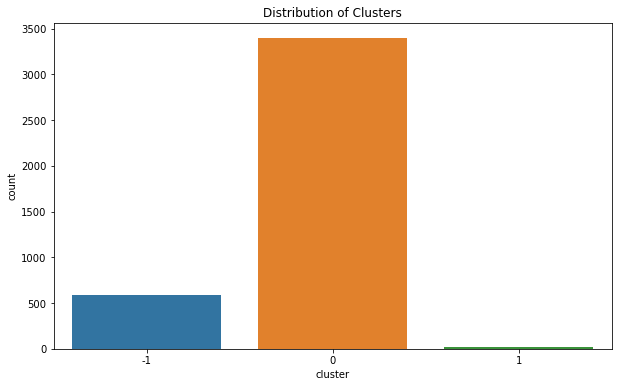

In [101]:
# Visualize the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=cl)
plt.title('Distribution of Clusters')
plt.show()

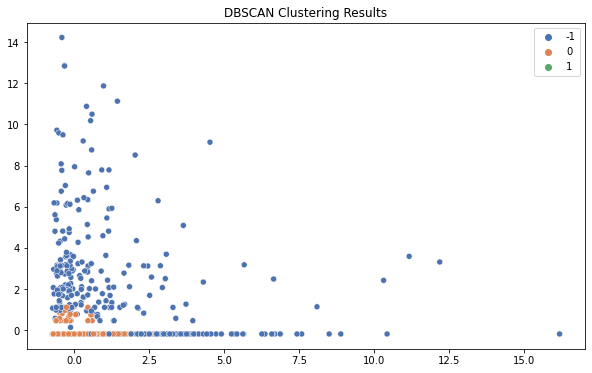

In [102]:
# Visualize the clusters (using first two features for 2D plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan.labels_, palette='deep')
plt.title('DBSCAN Clustering Results')
plt.show()

In [103]:
# Calculate and print silhouette score for the first DBSCAN
silhouette_avg = silhouette_score(X, dbscan.labels_)
print(f"The average silhouette score for DBSCAN (eps=1, min_samples=12) is: {silhouette_avg}")


The average silhouette score for DBSCAN (eps=1, min_samples=12) is: 0.48568279707121176


In [104]:
# Compare with the second DBSCAN
silhouette_avg_2 = silhouette_score(df_norm, cluster)
print(f"The average silhouette score for DBSCAN (eps=0.3, min_samples=4) is: {silhouette_avg_2}")


The average silhouette score for DBSCAN (eps=0.3, min_samples=4) is: 0.23361850393033437


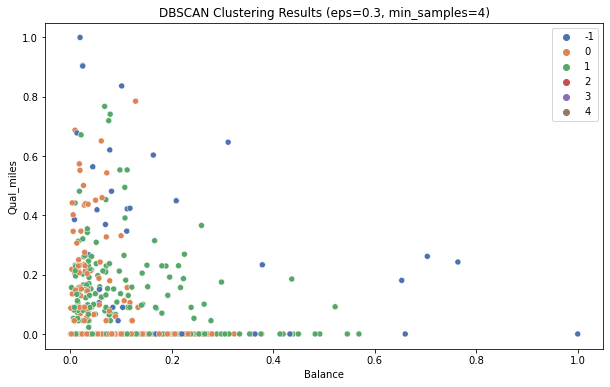

In [105]:

# Visualize the second DBSCAN results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_norm.iloc[:, 0], y=df_norm.iloc[:, 1], hue=cluster, palette='deep')
plt.title('DBSCAN Clustering Results (eps=0.3, min_samples=4)')
plt.show()

## Isolation Forest

In [106]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [108]:
iso=IsolationForest(contamination=0.5,n_estimators=10)

In [109]:
predictions=iso.fit(df_norm)

In [110]:
pred=predictions.predict(df_norm)
pred

array([ 1,  1,  1, ..., -1, -1,  1])

In [111]:
np.where(pred<0)

(array([   4,    6,    7, ..., 3995, 3996, 3997], dtype=int64),)

In [112]:

# Isolation Forest
iso = IsolationForest(contamination=0.5, n_estimators=10, random_state=42)
pred = iso.fit_predict(df_norm)

In [113]:
# Convert predictions to binary (inlier: 1, outlier: -1)
labels = pd.Series(pred).map({1: 'inlier', -1: 'outlier'})


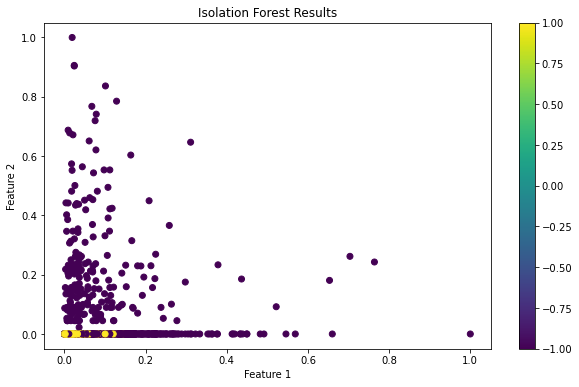

In [114]:
# 1. Visualize results (2D scatter plot using first two features)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_norm.iloc[:, 0], df_norm.iloc[:, 1], c=pred, cmap='viridis')
plt.colorbar(scatter)
plt.title('Isolation Forest Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

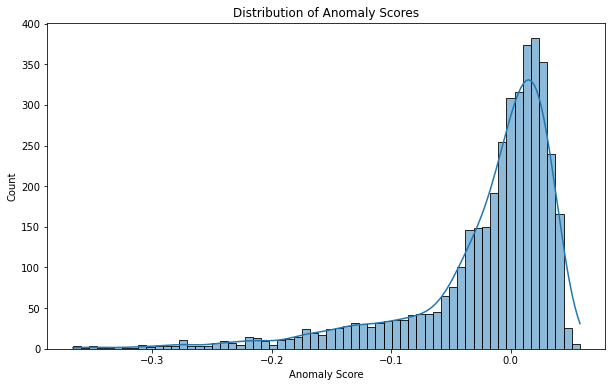

In [115]:
# 2. Distribution of anomaly scores
anomaly_scores = iso.decision_function(df_norm)
plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.show()

In [118]:
# Example: Creating "true" labels based on a threshold on the first feature
threshold = df_norm.iloc[:, 0].mean()
true_labels = (df_norm.iloc[:, 0] > threshold).astype(int)

print("Classification Report:")
print(classification_report(true_labels, (pred + 1) // 2))  # Convert -1/1 to 0/1

print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, (pred + 1) // 2))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.42      0.49      2726
           1       0.21      0.34      0.26      1273

    accuracy                           0.40      3999
   macro avg       0.40      0.38      0.37      3999
weighted avg       0.46      0.40      0.42      3999


Confusion Matrix:
[[1154 1572]
 [ 845  428]]


In [119]:
# 6. Visualize outliers in parallel coordinates
from pandas.plotting import parallel_coordinates

In [120]:
# Select a subset of features for clarity
subset_features = df_norm.columns[:5]  # first 5 features
df_subset = df_norm[subset_features]
df_subset['class'] = labels


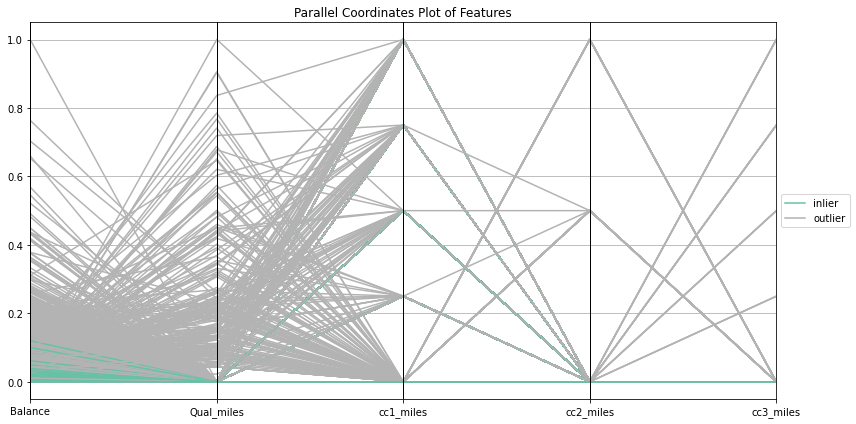

In [121]:
plt.figure(figsize=(12, 6))
parallel_coordinates(df_subset, 'class', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates Plot of Features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

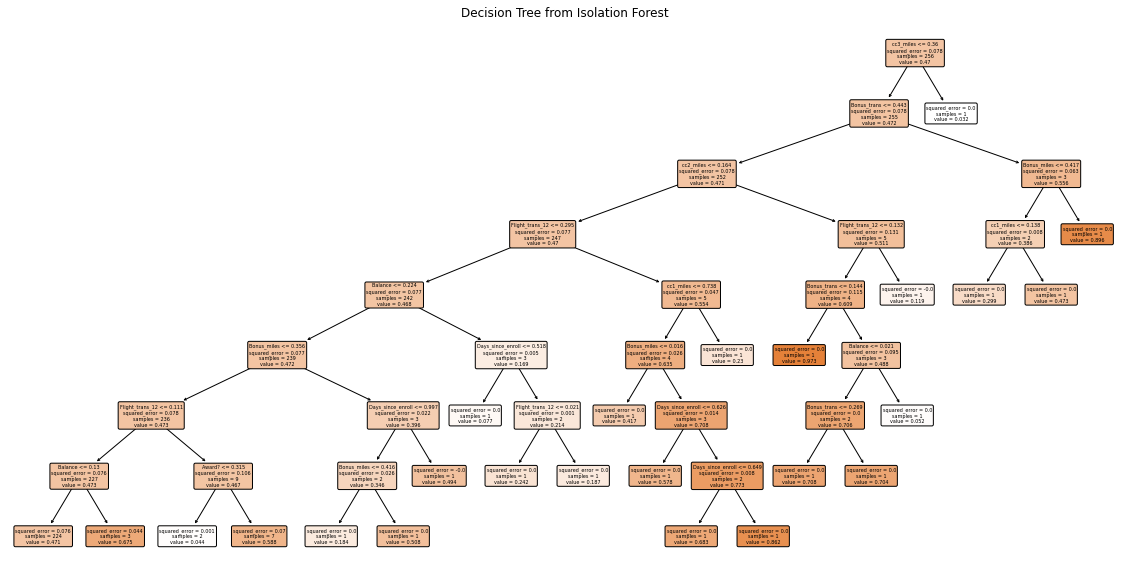

In [122]:
from sklearn.tree import plot_tree

# Assuming df_norm is your normalized dataframe

# Create and fit the Isolation Forest
iso = IsolationForest(contamination=0.1, n_estimators=10, random_state=42)
iso.fit(df_norm)

# Select a single tree from the forest
tree = iso.estimators_[0]

# Create a figure and axis
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(tree, feature_names=df_norm.columns, filled=True, rounded=True)

plt.title("Decision Tree from Isolation Forest")
plt.show()

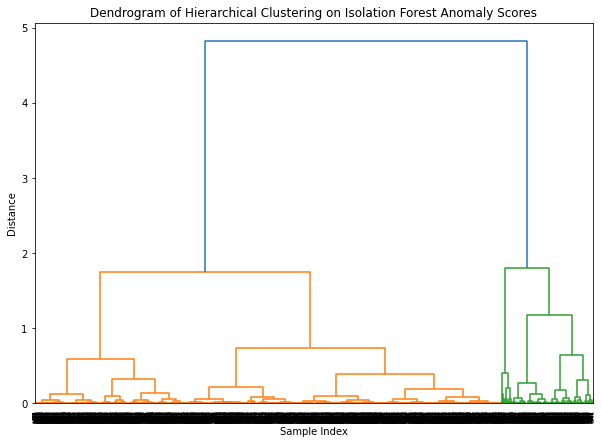

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Get the anomaly scores
anomaly_scores = iso.decision_function(df_norm)

# Reshape the scores to a 2D array
scores_2d = anomaly_scores.reshape(-1, 1)

# Perform hierarchical clustering on the anomaly scores
linkage_matrix = linkage(scores_2d, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)

plt.title('Dendrogram of Hierarchical Clustering on Isolation Forest Anomaly Scores')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Knearest Plot

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

In [130]:
!pip install kneed

In [131]:
nn=NearestNeighbors()

In [132]:
a=nn.fit(df_norm)

In [133]:
distance,indices=a.kneighbors()

In [134]:
distance.shape

(3999, 5)

In [135]:
indices.shape

(3999, 5)

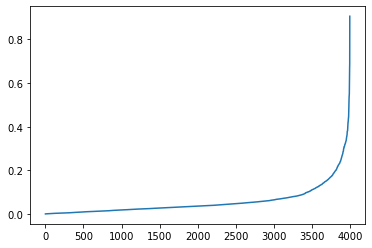

In [136]:
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.plot(distance)

In [137]:
# 1. K-distance graph
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df_norm)
distances, indices = neighbors_fit.kneighbors(df_norm)

In [138]:
# Sort the distances in ascending order
distances = np.sort(distances, axis=0)
distances = distances[:,1]

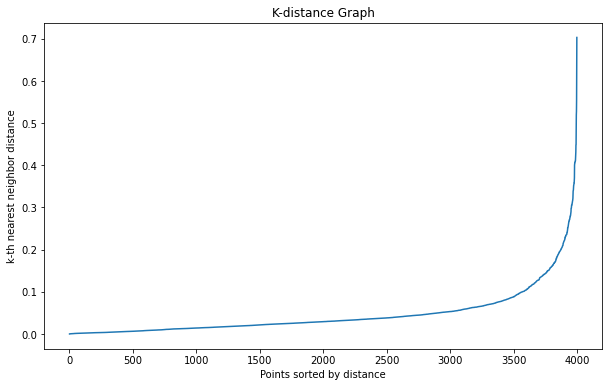

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(distances)+1), distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-th nearest neighbor distance')
plt.show()

In [140]:
# 2. Elbow method for optimal eps
knee_locator = KneeLocator(range(1, len(distances)+1), distances, curve='convex', direction='increasing')
elbow_point = knee_locator.elbow

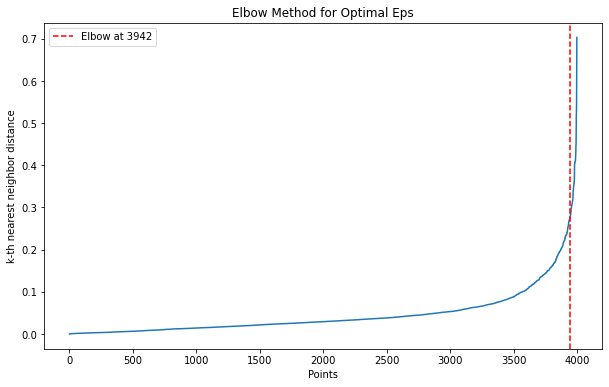

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(distances)+1), distances)
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at {elbow_point}')
plt.title('Elbow Method for Optimal Eps')
plt.xlabel('Points')
plt.ylabel('k-th nearest neighbor distance')
plt.legend()
plt.show()


In [142]:

print(f"Optimal eps value: {distances[elbow_point-1]}")

Optimal eps value: 0.2710343582053515


In [143]:
# 3. Silhouette analysis
from sklearn.cluster import DBSCAN

eps_range = np.arange(0.1, 1.1, 0.1)
silhouette_scores = []

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df_norm)
    
    # Silhouette score is only defined if number of labels is 2 or more
    if len(set(labels)) >= 2:
        score = silhouette_score(df_norm, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

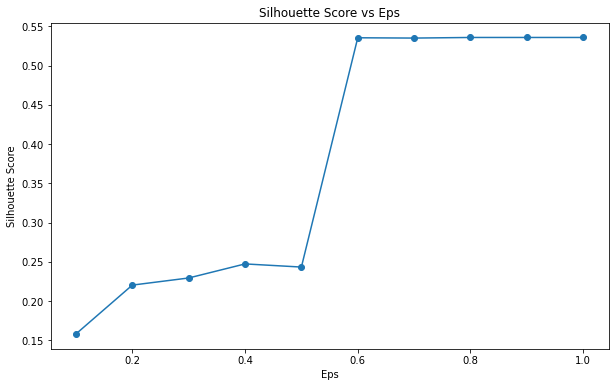

In [144]:
plt.figure(figsize=(10, 6))
plt.plot(eps_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Eps')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.show()


In [145]:

best_eps = eps_range[np.argmax(silhouette_scores)]
print(f"Best eps based on silhouette score: {best_eps}")

Best eps based on silhouette score: 0.8


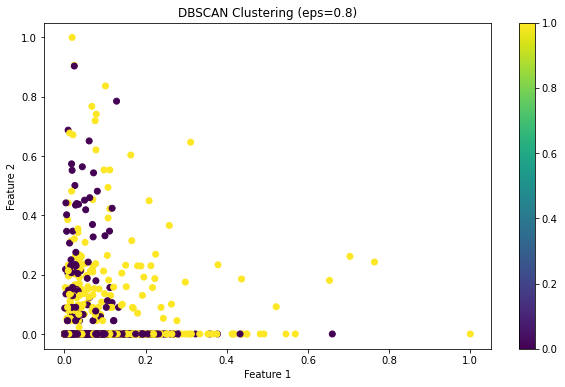

In [146]:
# 4. Cluster visualization
dbscan = DBSCAN(eps=best_eps, min_samples=5)
labels = dbscan.fit_predict(df_norm)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_norm.iloc[:, 0], df_norm.iloc[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title(f'DBSCAN Clustering (eps={best_eps})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


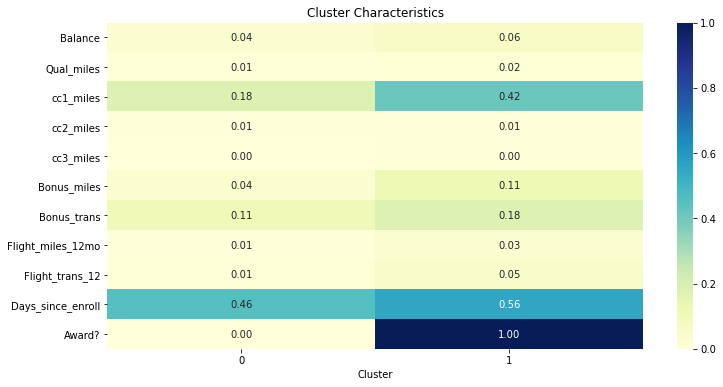

In [147]:
# 5. Cluster characteristics
df_clustered = pd.concat([df_norm, pd.Series(labels, name='Cluster')], axis=1)
cluster_means = df_clustered.groupby('Cluster').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Cluster Characteristics')
plt.show()


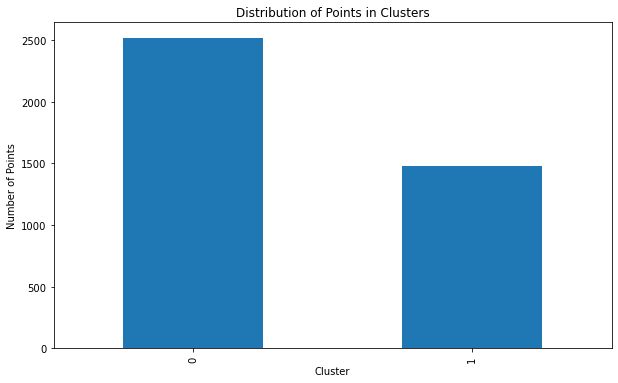

In [148]:
# 6. Distribution of points in clusters
cluster_counts = df_clustered['Cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Distribution of Points in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.show()

In [150]:
# 1. Compute distances using KNN
n_neighbors = min(len(df_norm) - 1, 20)  # Adjust as needed
nn = NearestNeighbors(n_neighbors=n_neighbors)
nn_fit = nn.fit(df_norm)
distances, indices = nn_fit.kneighbors(df_norm)


In [151]:
# 2. Create a distance matrix
n = len(df_norm)
distance_matrix = np.zeros((n, n))
for i in range(n):
    distance_matrix[i, indices[i]] = distances[i]
    distance_matrix[indices[i], i] = distances[i]

In [152]:
# 3. Ensure the distance matrix is symmetric
distance_matrix = np.maximum(distance_matrix, distance_matrix.T)

In [153]:
# 4. Convert distance matrix to condensed form
condensed_dist = squareform(distance_matrix)


In [154]:
# 5. Perform hierarchical clustering
linkage_matrix = linkage(condensed_dist, method='ward')


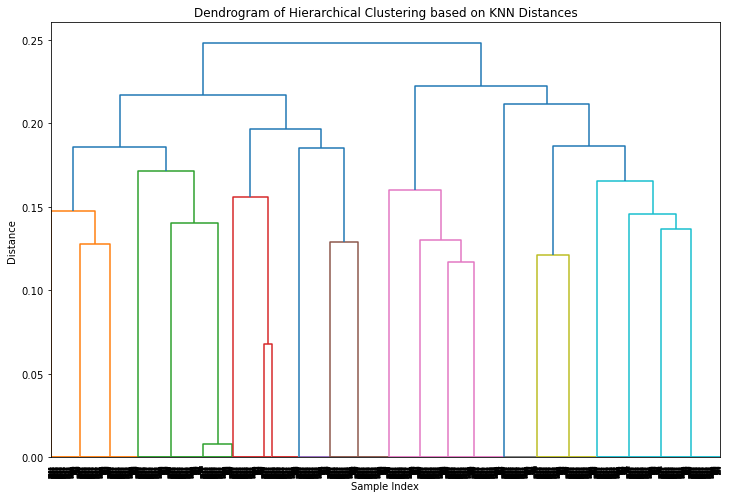

In [155]:
# 6. Create the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram of Hierarchical Clustering based on KNN Distances')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

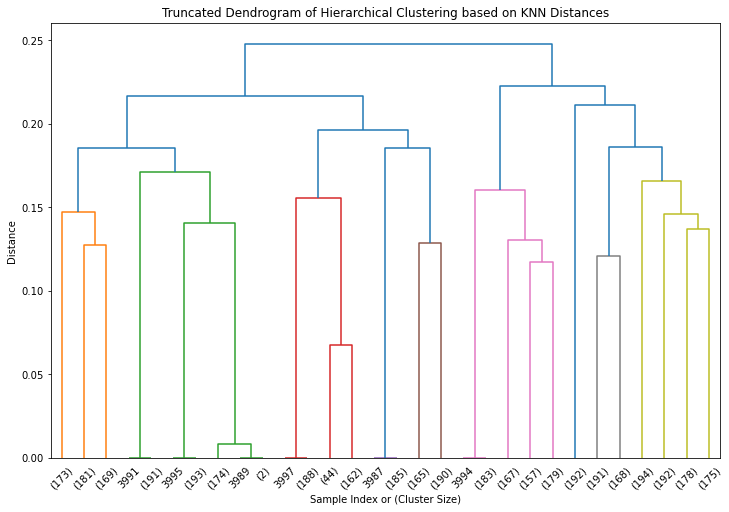

In [156]:
# 7. Plot truncated dendrogram if the full one is too complex
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)  # Show only the last 30 merge
plt.title('Truncated Dendrogram of Hierarchical Clustering based on KNN Distances')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

In [ ]:
#  In Hierarchical clustering, dendrograms are a drawback if the data is huge.
# Here, since data is huge, hierarchical clustering is not considered as a good option. 
# K-means is considered as the simplest and quickest one which guarantees convergence.